# Проект:  "Приоритезация гипотез для увеличения выручки интернет-магазина, проведение А/В теста"

## Введение  

Отдел маркетинга крупного интернет-магазина подготовил список гипотез для увеличения выручки.  

**Цель:** приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты.  

Исследование проводится в два этапа:  

1. Приоритизация гипотез.
2. Анализ A/B-теста.

## Приоритизация гипотез  

### Обзор данных

Ознакомимся с входными данными.

In [1]:
#импортируем библиотеки

import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from datetime import date
from matplotlib import pyplot as plt
from scipy import stats as st
import math as mth

In [2]:
#игнорируем предупреждения

import warnings

warnings.filterwarnings('ignore') 

Прочитаем файлы с данными.

In [3]:
#прочитаем файл с данными и сохраним его в переменную

data = pd.read_csv('/datasets/hypothesis.csv')
data

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


In [4]:
data.info() #получим общую информацию о таблице

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
Hypothesis    9 non-null object
Reach         9 non-null int64
Impact        9 non-null int64
Confidence    9 non-null int64
Efforts       9 non-null int64
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


В наличии следующие данные:  

- Hypothesis — краткое описание гипотезы;  
- Reach — охват пользователей по 10-балльной шкале;  
- Impact — влияние на пользователей по 10-балльной шкале;  
- Confidence — уверенность в гипотезе по 10-балльной шкале;  
- Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале.



### Предобработка данных  

Приведем названия столбцов к единому стилю написания, чтобы все буквы были строчными.

In [5]:
data.columns = data.columns.str.lower()
data.columns

Index(['hypothesis', 'reach', 'impact', 'confidence', 'efforts'], dtype='object')

### Применение фреймворков ICE  и RICE для приоритизации гипотез  
 

In [6]:
#создадим новый столбец ice и запишем в него уровень приоритета гипотез для фреймворка ICE
data['ice'] = data['impact']*data['confidence']/data['efforts']

#создадим новый столбец rice и запишем в него уровень приоритета гипотез для фреймворка RICE
data['rice'] = data['reach']*data['impact']*data['confidence']/data['efforts']

# выведем таблицы и отсортируем их по новым столбцам
display(data.sort_values(by='ice', ascending=False).round(2))
display(data.sort_values(by='rice', ascending=False).round(2))

,hypothesis,reach,impact,confidence,efforts,ice,rice
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.20,16.2
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.33,40.0
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.20,112.0
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.00,40.0
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.00,56.0
1,"Запустить собственную службу доставки, что сок...",2,5,4,10,2.00,4.0
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,1.33,4.0
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8,1.12,9.0
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,1.00,3.0


,hypothesis,reach,impact,confidence,efforts,ice,rice
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.20,112.0
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.00,56.0
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.33,40.0
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.00,40.0
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.20,16.2
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8,1.12,9.0
1,"Запустить собственную службу доставки, что сок...",2,5,4,10,2.00,4.0
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,1.33,4.0
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,1.00,3.0


### Вывод  

В файле 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Efforts.

Названия столбцов приведены к единому стилю написания. Нет пропусков значений, дубликатов и некорректных значений. С типами данных все в порядке.  

После применения фреймворка ICE самыми приоритетными стали гипотезы под номерами 8, 0 и 7. А после фреймврка RICE - 7, 2 и 0, причем гипотеза под номером 7 стала абсолютным лидером, гипотеза 8 заняла только пятое место. Это произошло по причине того, что параметр riach у седьмой гипотезы имеет самый высокий бал - эта гипотеза охватывает большое кол-во пользователей, а вот riach для восьмой гипотезы очень низкий. Помимо этого гипотезу под номером 0 проверить чуть сложнее, чем седьмую, а у второй гипотезы низкий показатель параметра impact - изменение не окажет существенного влияния на пользователей. Поэтому по всем показателям выигрывает седимая гипотеза.

In [7]:
data.iloc[7]['hypothesis']

'Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок'

## Анализ A/B-теста  

### Обзор данных  

Ознакомимся с результатами A/B-тестов

In [8]:
#прочитаем файлы с данными и сохраним их в переменные

orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

display(orders.head()) #выведем на экран первые 5 строк таблицы orders
display(visitors.head()) #выведем на экран первые 5 строк таблицы visitors

display(orders.info()) #получим общую информацию о таблице orders
display(visitors.info()) #получим общую информацию о таблице visitors

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null object
group       62 non-null object
visitors    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


None

В наличии следующие данные:  

Таблица orders:  

- transactionId — идентификатор заказа;
- visitorId — идентификатор пользователя, совершившего заказ;
- date — дата, когда был совершён заказ;
- revenue — выручка заказа;
- group — группа A/B-теста, в которую попал заказ.


Таблица visitors:

- date — дата;
- group — группа A/B-теста;
- visitors — количество пользователей в указанную дату в указанной группе A/B-теста

### Предобработка данных  

#### Приведем названия столбцов к единому стилю написания

In [9]:
orders = orders.rename(columns={'transactionId':'transaction_id', 'visitorId':'visitor_id'})
orders.columns

Index(['transaction_id', 'visitor_id', 'date', 'revenue', 'group'], dtype='object')

#### Изменим тип данных

In [10]:
#приведем столбцы с датами к типу datetime64[ns]

orders['date'] = pd.to_datetime(orders['date'])
visitors['date'] = pd.to_datetime(visitors['date'])

display(orders.info())
display(visitors.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transaction_id    1197 non-null int64
visitor_id        1197 non-null int64
date              1197 non-null datetime64[ns]
revenue           1197 non-null int64
group             1197 non-null object
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null datetime64[ns]
group       62 non-null object
visitors    62 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


None

#### Проверим наличие дубликатов.

In [11]:
#найдем сумму явных дубликатов в таблицах

display(visitors.duplicated().sum())
display(orders.duplicated().sum())

0

0

#### Проверим корректность значений в таблицах

In [12]:
#выведет уникальные значения для столбцов group для обеих таблиц

display(orders['group'].unique())
display(visitors['group'].unique())

array(['B', 'A'], dtype=object)

array(['A', 'B'], dtype=object)

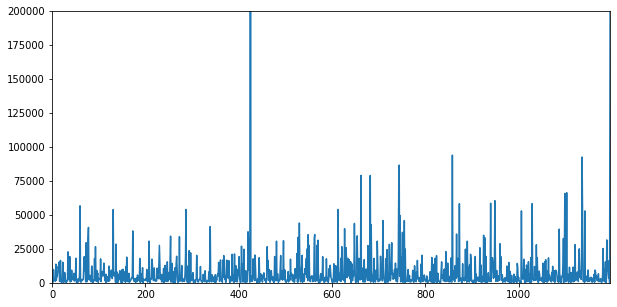

In [13]:
#определим нет ли отрицательных значений в столбце revenue таблицы orders 
orders['revenue'].plot(ylim=(0,200000), figsize=(10,5));

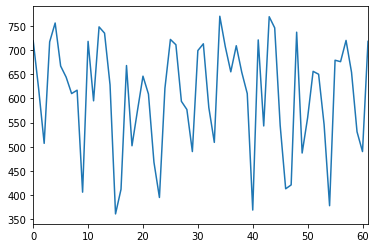

In [14]:
# и в столбце visitors таблицы visitors

visitors['visitors'].plot();

Посмотрим, нет ли одних и тех же пользователей, попавших и в группу А и в группу В.

In [15]:
#найдем значения, которые встречаются в обоих группах

inter = np.intersect1d(orders.query('group == "A"')['visitor_id'].unique(), orders.query('group == "B"')['visitor_id'].unique())

In [16]:
#уберем из таблицы таких пользователей

orders = orders[~orders['visitor_id'].isin(inter)]
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1016 entries, 0 to 1196
Data columns (total 5 columns):
transaction_id    1016 non-null int64
visitor_id        1016 non-null int64
date              1016 non-null datetime64[ns]
revenue           1016 non-null int64
group             1016 non-null object
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 47.6+ KB


#### Вывод  

В таблице orders пять столбцов с информацией о заказах для каждой группы теста. В таблице  visitors отражено кол-во пользователей из каждой группы по дням.

Названия столбцов приведены к единому стилю написания. Нет пропусков значений, дубликатов и некорректных значений.  

В столбцах с датами поменяли тип с object на datetime64.  

Из таблицы orders удалили пользователей, которые попали одновременно в группу А и в группу В.

### Анализ A/B-тестов

Чтобы проанализировать А/В тесты и построить графики, нужно собрать кумулятивные данные.

In [17]:
#создаем массив уникальных пар значений дат и групп теста

dates_groups = orders[['date','group']].drop_duplicates() 

In [18]:
#собираем агрегированные кумулятивные по дням данные о заказах и сохраняем в переменную

orders_aggregated = dates_groups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
                    .agg({'date' : 'max', 'group' : 'max', 'transaction_id' : 'nunique', 'visitor_id' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

In [19]:
#собираем агрегированные кумулятивные по дням данные о посетителях и сохраняем в переменную

visitors_aggregated = dates_groups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]
                    .agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

In [20]:
#объединяем данные в одной таблице и присваиваем столбцам названия

cumulative_data = orders_aggregated.merge(visitors_aggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulative_data.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

cumulative_data.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,42,36,234381,1338
3,2019-08-02,B,40,39,221801,1294
4,2019-08-03,A,66,60,346854,1845


####  График кумулятивной выручки по группам  

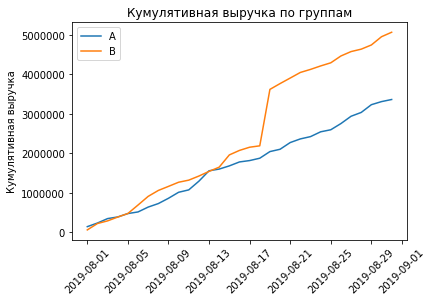

In [21]:
#создаем таблицу с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulative_revenue_a = cumulative_data[cumulative_data['group']=='A'][['date','revenue', 'orders']]

#создаем таблицу с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulative_revenue_b = cumulative_data[cumulative_data['group']=='B'][['date','revenue', 'orders']]

#строим график выручки группы А
plt.plot(cumulative_revenue_a['date'], cumulative_revenue_a['revenue'], label='A')

#строим график выручки группы B
plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['revenue'], label='B')

plt.legend()
plt.xticks(rotation=45)
plt.title('Кумулятивная выручка по группам')
plt.ylabel('Кумулятивная выручка');

Выручка увеличивается в течение всего теста.
Однако график выручки группы В в одной точке резко возрастает. Это говорит о том, что в данных скорее всего есть аномальные значения.

#### График кумулятивного среднего чека по группам

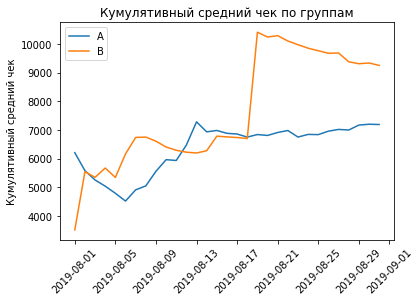

In [22]:
#построим графики среднего чека по группам:делим кумулятивную выручку на кумулятивное число заказов

plt.plot(cumulative_revenue_a['date'], cumulative_revenue_a['revenue']/cumulative_revenue_a['orders'], label='A')
plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['revenue']/cumulative_revenue_b['orders'], label='B')
plt.legend()
plt.xticks(rotation=45)
plt.title('Кумулятивный средний чек по группам')
plt.ylabel('Кумулятивный средний чек');

Средний чек гуппы В тоже резко возрастает в той же самой точке, а для группы А в начале теста виден провал значений. Возможно, в группы А и B попали аномалии. Тогда обоим группам нужно больше данных, чтобы прийти к реальному среднему чеку.

#### График относительного изменения кумулятивного среднего чека группы B к группе A

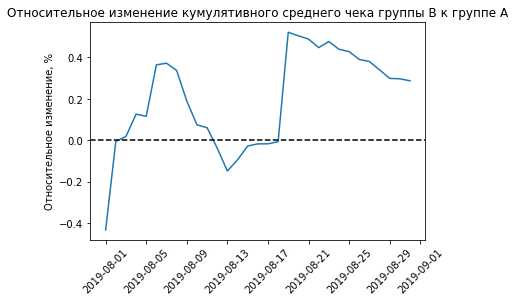

In [23]:
#собираем данные с кумулятивным количеством заказов и кумулятивной выручкой в одной таблице
merged_cumulative_revenue = cumulative_revenue_a.merge(cumulative_revenue_b, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим график отношения средних чеков
plt.plot(merged_cumulative_revenue['date'], (merged_cumulative_revenue['revenueB']/merged_cumulative_revenue['ordersB'])/(merged_cumulative_revenue['revenueA']/merged_cumulative_revenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.xticks(rotation=45)
plt.title('Относительное изменение кумулятивного среднего чека группы B к группе A')
plt.ylabel('Относительное изменение, %');

В нескольких точках график различий между средними чеками резко падает и снова взлетает - это подтверждает наличие выбросов.

#### График кумулятивной конверсии по группам

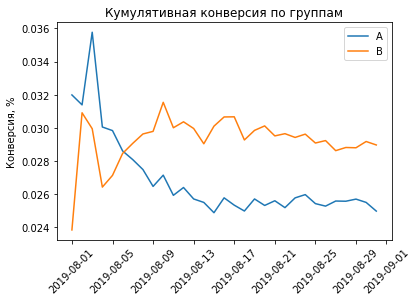

In [24]:
#посчитаем кумулятивную конверсию
cumulative_data['conversion'] = cumulative_data['orders']/cumulative_data['visitors']

#запишем в отдельную таблицу данные по группе A
cumulative_data_a = cumulative_data[cumulative_data['group']=='A']

#запишем в отдельную таблицу по группе B
cumulative_data_b = cumulative_data[cumulative_data['group']=='B']

#построим графики
plt.plot(cumulative_data_a['date'], cumulative_data_a['conversion'], label='A')
plt.plot(cumulative_data_b['date'], cumulative_data_b['conversion'], label='B')
plt.legend()
plt.xticks(rotation=45)
plt.title('Кумулятивная конверсия по группам')
plt.ylabel('Конверсия, %');

Группы сильно колеблются в начале теста, но затем конверсия группы B выросла, а конверсия группы A упала. Можно сказать, что группа B стабильно лучше группы A по конверсии.


#### График относительного изменения кумулятивной конверсии группы B к группе A

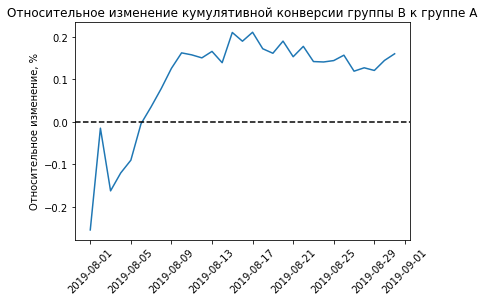

In [25]:
#построим график относительного различия кумулятивных конверсий

merged_cumulative_conversions = cumulative_data_a[['date','conversion']].merge(cumulative_data_b[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(merged_cumulative_conversions['date'], merged_cumulative_conversions['conversionB']/merged_cumulative_conversions['conversionA']-1)

plt.axhline(y=0, color='black', linestyle='--')
plt.xticks(rotation=45)
plt.title('Относительное изменение кумулятивной конверсии группы B к группе A')
plt.ylabel('Относительное изменение, %');

В начале теста конверсия группы B была значительно ниже группы A, но затем все поменялось и группа В вырвалась вперёд.
Кажется, что отношение конверсии еще не установилось, скорее всего, делать какие-либо выводы по тесту преждевременно.

#### График количества заказов по пользователям

In [26]:
#запишем число заказов по пользователям в переменную
orders_by_users = orders.groupby('visitor_id', as_index=False).agg({'transaction_id': 'nunique'})

#назовем столбцы
orders_by_users.columns = ['user_id', 'orders']

#отсортируем по убыванию количества заказов
orders_by_users.sort_values(by='orders', ascending=False).head(10)

,user_id,orders
908,3967698036,3
55,249864742,3
478,2108163459,3
687,2988190573,3
890,3908431265,3
138,611059232,3
632,2742574263,3
157,678354126,2
323,1404560065,2
452,1985475298,2


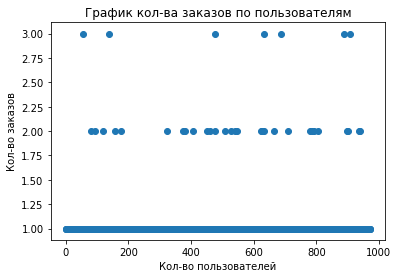

In [27]:
#построим график кол-ва заказов по пользователям
x_values = pd.Series(range(0, len(orders_by_users)))
plt.scatter(x_values, orders_by_users['orders'])
plt.title('График кол-ва заказов по пользователям')
plt.ylabel('Кол-во заказов')
plt.xlabel('Кол-во пользователей');

Есть несколько пользователи, совершивших три заказа, при том что основная часть пользователей делала обычно один заказ. Три заказа скорее исключение, а не аномалия. Чтобы определить долю большого кол-ва заказов посчитаем 95-й и 99-й перцентили количества заказов на пользователя.

In [28]:
np.percentile(orders_by_users['orders'], [95, 99])

array([1., 2.])

Не более 5% пользователей оформляли больше чем 1 заказ, не более 1% оформляли больше 3 заказов. Аномалий не наблюдается, никаких пользователей отсеивать не будем.

#### График стоимостей заказов

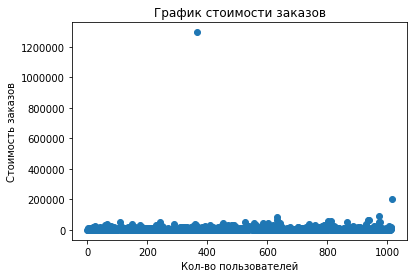

In [29]:
#построим график стоимости заказов по пользователям
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.title('График стоимости заказов')
plt.ylabel('Стоимость заказов')
plt.xlabel('Кол-во пользователей');

Цены заказов находятся в пределах примерно 100 000 рублей. Кроме двух заказов, один из которых точно аномально высок. Такие выбросы нужно удалить.  

Посчитаем 95-й и 99-й перцентили стоимости заказов.

In [30]:
np.percentile(orders['revenue'], [95, 99])

array([26785., 53904.])

Не более 5% пользователей оформляли заказ стоимостью больше 27000, не более 1% оформляли заказ стоимостью выше 54000. Можно отсеять заказы дороже 54000.

#### Статистическая значимость различий в конверсии и в среднем чеке между группами по «сырым» данным

Создадим новую таблицу с данными:

- orders_per_date_a — количество заказов в выбранную дату в группе A;
- revenue_per_date_a — суммарная выручка в выбранную дату в группе A;
- orders_per_date_b — количество заказов в выбранную дату в группе B;
- revenue_per_date_b — суммарная выручка в выбранную дату в группе B;
- orders_cummulative_a — суммарное число заказов до выбранной даты включительно в группе A;
- revenue_cummulative_a — суммарная выручка до выбранной даты включительно в группе A;
- orders_cummulative_b — суммарное количество заказов до выбранной даты включительно в группе B;
- revenue_cummulative_b — суммарная выручка до выбранной даты включительно в группе B;
- visitors_per_date_a — количество пользователей в выбранную дату в группе A;
- visitors_per_date_b — количество пользователей в выбранную дату в группе B;
- visitors_cummulative_a — количество пользователей до выбранной даты включительно в группе A;
- visitors_cummulative_b — количество пользователей до выбранной даты включительно в группе B.

In [31]:
#запишем в переменную кол-во пользователей для группы А по дням, назовем столбцы
visitors_a_daily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitors_a_daily.columns = ['date', 'visitors_per_date_a']

#запишем в переменную кумулятивное кол-во пользователей для группы А по дням, назовем столбцы
visitors_a_cummulative = visitors_a_daily.apply(
    lambda x: visitors_a_daily[visitors_a_daily['date'] <= x['date']].agg(
        {'date': 'max', 'visitors_per_date_a': 'sum'}
    ),
    axis=1,
)
visitors_a_cummulative.columns = ['date', 'visitors_cummulative_a']

#запишем в переменную кол-во пользователей для группы В по дням, назовем столбцы
visitors_b_daily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitors_b_daily.columns = ['date', 'visitors_per_date_b']

#запишем в переменную кумулятивное кол-во пользователей для группы В по дням, назовем столбцы
visitors_b_cummulative = visitors_b_daily.apply(
    lambda x: visitors_b_daily[visitors_b_daily['date'] <= x['date']].agg(
        {'date': 'max', 'visitors_per_date_b': 'sum'}
    ),
    axis=1,
)
visitors_b_cummulative.columns = ['date', 'visitors_cummulative_b']

#запишем в переменную кол-во заказов для группы А по дням, назовем столбцы
orders_a_daily = (
    orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
orders_a_daily.columns = ['date', 'orders_per_date_a', 'revenue_per_date_a']

#запишем в переменную кумулятивное кол-во заказов для группы А по дням, назовем столбцы
orders_a_cummulative = orders_a_daily.apply(
    lambda x: orders_a_daily[orders_a_daily['date'] <= x['date']].agg(
        {'date': 'max', 'orders_per_date_a': 'sum', 'revenue_per_date_a': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
orders_a_cummulative.columns = [
    'date',
    'orders_cummulative_a',
    'revenue_cummulative_a',
]

#запишем в переменную кол-во заказов для группы В по дням, назовем столбцы
orders_b_daily = (
    orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
orders_b_daily.columns = ['date', 'orders_per_date_b', 'revenue_per_date_b']

#запишем в переменную кумулятивное кол-во заказов для группы В по дням, назовем столбцы
orders_b_cummulative = orders_b_daily.apply(
    lambda x: orders_b_daily[orders_b_daily['date'] <= x['date']].agg(
        {'date': 'max', 'orders_per_date_b': 'sum', 'revenue_per_date_b': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
orders_b_cummulative.columns = [
    'date',
    'orders_cummulative_b',
    'revenue_cummulative_b',
]

#соединим все данные в одну таблицу
data_new = (
    orders_a_daily.merge(
        orders_b_daily, left_on='date', right_on='date', how='left'
    )
    .merge(orders_a_cummulative, left_on='date', right_on='date', how='left')
    .merge(orders_b_cummulative, left_on='date', right_on='date', how='left')
    .merge(visitors_a_daily, left_on='date', right_on='date', how='left')
    .merge(visitors_b_daily, left_on='date', right_on='date', how='left')
    .merge(visitors_a_cummulative, left_on='date', right_on='date', how='left')
    .merge(visitors_b_cummulative, left_on='date', right_on='date', how='left')
)

data_new.head()

,date,orders_per_date_a,revenue_per_date_a,orders_per_date_b,revenue_per_date_b,orders_cummulative_a,revenue_cummulative_a,orders_cummulative_b,revenue_cummulative_b,visitors_per_date_a,visitors_per_date_b,visitors_cummulative_a,visitors_cummulative_b
0,2019-08-01,23,142779,17,59758,23,142779,17,59758,719,713,719,713
1,2019-08-02,19,91602,23,162043,42,234381,40,221801,619,581,1338,1294
2,2019-08-03,24,112473,14,67049,66,346854,54,288850,507,509,1845,1803
3,2019-08-04,11,41176,14,96890,77,388030,68,385740,717,770,2562,2573
4,2019-08-05,22,86383,21,89908,99,474413,89,475648,756,707,3318,3280


- **Посчитаем статистическую значимость различий в конверсии между группами по «сырым» данным:**
  
Нулевая гипотеза: статистически значимых различий в конверсии между группами нет.  
Альтернативная гипотеза: статистически значимые различия в конверсии между группами есть.  
Уровень статистической значимости зададим 5%.

In [32]:
#cоздадим переменные, в которые запишем пользователей,
#которые заказывали хотя бы 1 раз, укажем число совершённых заказов

orders_by_users_a = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
orders_by_users_a.columns = ['user_id', 'orders']

orders_by_users_b = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
orders_by_users_b.columns = ['user_id', 'orders']

#создадим переменные, в которых пользователям из разных групп будет соответствовать
#количество заказов: тем, кто ничего не заказал, будут соответствовать нули

sample_a = pd.concat(
    [
        orders_by_users_a['orders'],
        pd.Series(
            0,
            index=np.arange(
                data_new['visitors_per_date_a'].sum() - len(orders_by_users_a['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sample_b = pd.concat(
    [
        orders_by_users_b['orders'],
        pd.Series(
            0,
            index=np.arange(
                data_new['visitors_per_date_b'].sum() - len(orders_by_users_b['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

#рассчитаем статистическую значимость различий в конверсии между группами по «сырым» данным
display("{0:.3f}".format(st.mannwhitneyu(sample_a, sample_b)[1]))

#выведем относительный прирост конверсии группы B
display("{0:.3f}".format(sample_b.mean() / sample_a.mean() - 1))

'0.006'

'0.160'

**Вывод:**  
Первое число — p-value = 0.006 меньше 5%. Следовательно, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет, отвергаем. Относительный прирост группы B равеный 16% это подтверждает.

- **Посчитаем статистическую значимость различий в среднем чеке между группами по «сырым» данным:**   

Нулевая гипотеза: статистически значимых различий в среднем чеке между группами нет.   
Альтернативная гипотеза: статистически значимые различия в среднем чеке между группами есть.     
Уровень статистической значимости зададим 5%.

In [33]:
#рассчитаем статистическую значимость различий в среднем чеке между группами по «сырым» данным
display('{0:.3f}'.format(st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))

#выведем относительный прирост среднего чека группы B
display('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

'0.415'

'0.287'

P-value значительно больше 5%. Следовательно, нулевую гипотезу не отвергаем и считаем, что в среднем чеке нет различий. Хотя, средний чек группы B значительно выше среднего чека группы A.

#### Статистическая значимость различий в конверсии и в среднем чеке между группами по «очищенным» данным   

Сначала очистим данные.  
Примем за аномальных пользователей тех, кто совершил заказ дороже 54000 рублей - уберем 1% пользователей с дорогими заказами.

In [34]:
users_with_expensive_orders = orders[orders['revenue'] > 54000]['visitor_id']
users_with_expensive_orders.shape

(9,)

- **Посчитаем статистическую значимость различий в конверсии между группами по «очищенным» данным:**  

Нулевая гипотеза: статистически значимых различий в конверсии между группами нет.  
Альтернативная гипотеза: статистически значимые различия в конверсии между группами есть.  
Уровень статистической значимости зададим 5%.

In [35]:
#подготовим выборки количества заказов по пользователям по группам теста
sample_a_filtered = pd.concat(
    [
        orders_by_users_a[
            np.logical_not(orders_by_users_a['user_id'].isin(users_with_expensive_orders))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data_new['visitors_per_date_a'].sum() - len(orders_by_users_a['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sample_b_filtered = pd.concat(
    [
        orders_by_users_b[
            np.logical_not(orders_by_users_b['user_id'].isin(users_with_expensive_orders))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data_new['visitors_per_date_b'].sum() - len(orders_by_users_b['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

#рассчитаем статистическую значимость различий в конверсии между группами по «очищенным» данным
display('{0:.3f}'.format(st.mannwhitneyu(sample_a_filtered, sample_b_filtered)[1]))

#выведем относительный прирост конверсии группы B
display('{0:.3f}'.format(sample_b_filtered.mean()/sample_a_filtered.mean()-1))

'0.005'

'0.164'

Результаты по конверсии практически не изменились по сравнению с «сырыми» данными.

- **Посчитаем статистическую значимость различий в среднем чеке между группами по «очищенным» данным:**  

Нулевая гипотеза: статистически значимых различий в среднем чеке между группами нет.   
Альтернативная гипотеза: статистически значимые различия в среднем чеке между группами есть.   
Уровень статистической значимости зададим 5%.

In [36]:
#рассчитаем статистическую значимость различий в среднем чеке между группами по «очищенным» данным
display(
    '{0:.3f}'.format(
        st.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitor_id'].isin(users_with_expensive_orders)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(users_with_expensive_orders)),
                )
            ]['revenue'],
        )[1]
    )
)

#выведем относительный прирост среднего чека группы B
display(
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitor_id'].isin(users_with_expensive_orders)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitor_id'].isin(users_with_expensive_orders)),
            )
        ]['revenue'].mean()
        - 1
    )
)

'0.450'

'-0.032'

Нулевая гипотеза также подтверждена, кроме этого относительный прирост среднего чека группы B упал, значит на него влияли выбросы.

#### Вывод  

Тест можно остановить и признать успешным, так конверсия в группе 

## Итоги исследования

Прежде чем исследовать данные, приоритизировать гипотезы и проанализировать результаты А/В тестов, мы ознакомились с данными, проверили их корректность, привели к единому стилю написание столбцов, изменили некоторые типы данных.  

Исследуя данные, определили что:  
- После приоритезации гипотез с помощью фрэймворков ICE и RICE определили седьмую гипотезу как наилучшую для увеличения выручки интернет-магазина: 'Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок'.

После проведения А/В тестов:
- Cтатистически значимые различия по конверсии между группами есть как по «сырым», так и по очищенным данным, конверсия в группе В лучше, это подтверждает и график различия конверсии между группами  

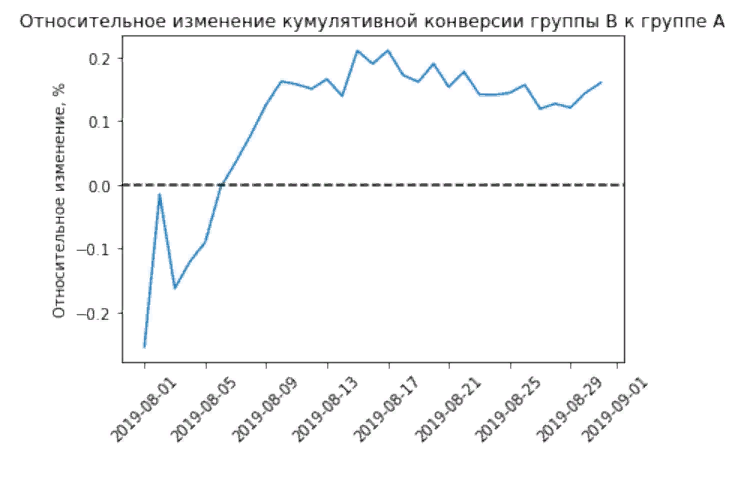

- Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий, а график различия среднего чека говорит о том, что результаты группы B после небольшого подьема, начали падать, а на резкие колебания повлияли аномалии.

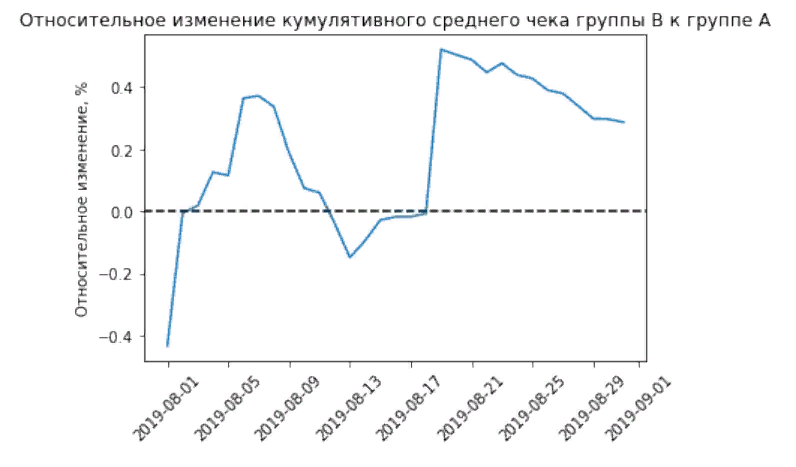

Исходя из полученных данных, принимаем решение остановить тест и признать его успешным, так как конверсия пользователей в покупатели в группе В к концу теста увеличилась примерно на 17% и зафиксировалась. При том что средний чек остался примено таким же, как в группе А, выручка все таки увеличилась.